In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#Modulazione della stringa di bit "1, 0, 1, 0, 1, 1, 0"

In [4]:
# Parameters
binary_string = [1, 0, 1, 0, 1, 1, 0]  # Example binary string
bit_duration = 1  # Duration of each bit in seconds
sample_rate = 1000  # Samples per second

# Frequency of the carrier wave for ASK and PSK
carrier_freq = 10

# Frequency of the carrier wave for FSK
carrier_freq_1 = 15  # Carrier frequency for binary 1 in FSK
carrier_freq_0 = 5  # Carrier frequency for binary 0 in FSK

# Time vector
samples_per_bit = int(sample_rate * bit_duration)
time = np.linspace(0, bit_duration * len(binary_string), samples_per_bit * len(binary_string), endpoint=False)


def generate_carrier(frequency, time, amplitude=1.0):
    """Generate a carrier wave."""
    return amplitude * np.sin(2 * np.pi * frequency * time)


## PAM

binary string = [1, 0, 1, 0, 1, 1, 0]



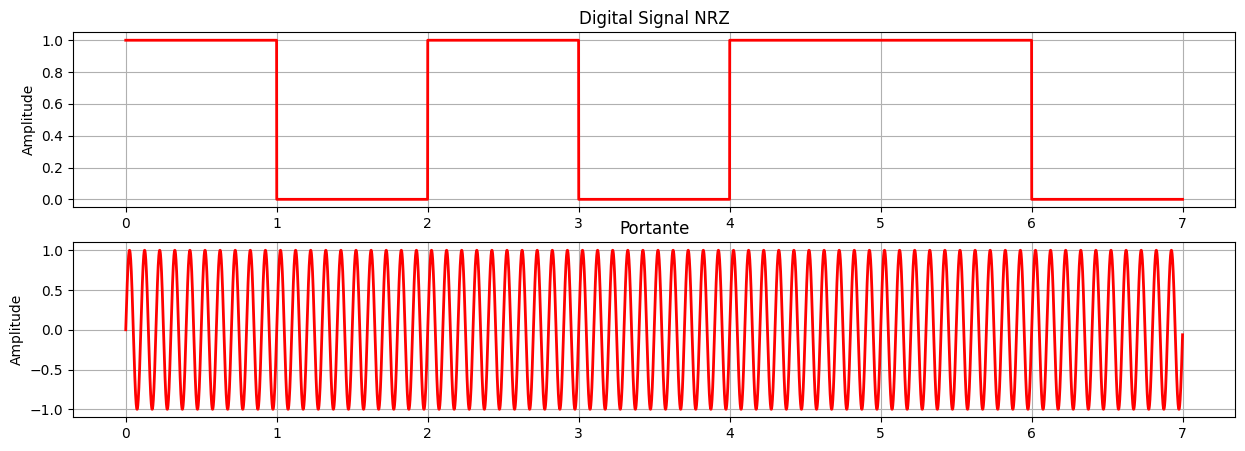

In [6]:
def pam_modulation(binary_string, time, carrier_freq, samples_per_bit):
    """Pulse Amplitude Modulation (PAM)."""
    modulated_signal = []

    for i, bit in enumerate(binary_string):
        if bit == 1:
            wave_piece = 1.0 * np.ones(samples_per_bit)
        else:
            wave_piece = 0.0 * np.ones(samples_per_bit)
        modulated_signal.extend(wave_piece)

    return np.array(modulated_signal)


# Generate modulated signals
pam_signal = pam_modulation(binary_string, time, carrier_freq, samples_per_bit)
carrier = generate_carrier(carrier_freq, time)

# Plot signals
print(f"binary string = {binary_string}\n")
plt.figure(figsize=(15,5))

plt.subplot(2, 1, 1)
plt.plot(time, pam_signal, color='red', linewidth=2)
plt.title("Digital Signal NRZ")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, carrier, color='red', linewidth=2)
plt.title("Portante")
plt.ylabel("Amplitude")
plt.grid()


## ASK

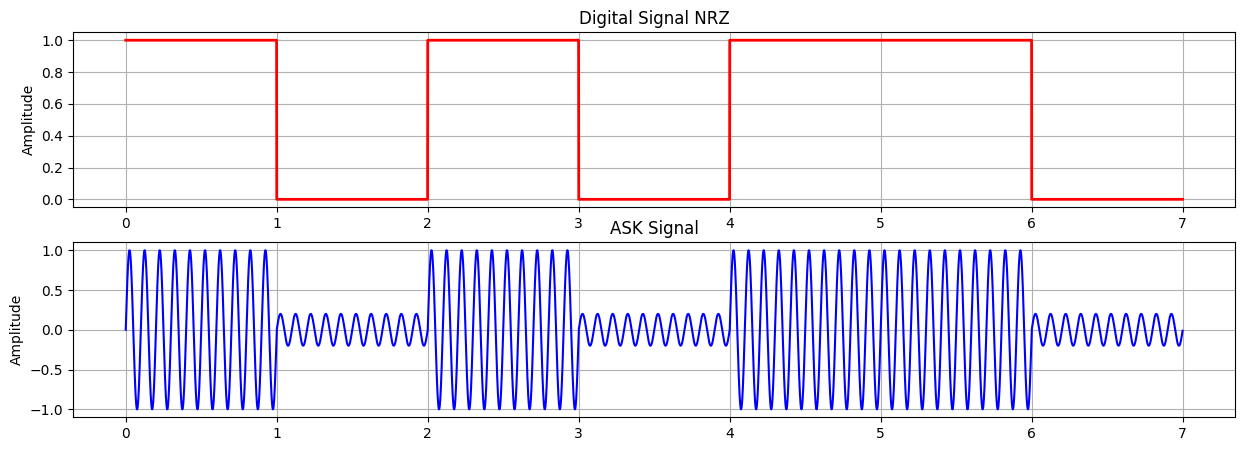

In [ ]:

def ask_modulation(binary_string, time, carrier_freq, samples_per_bit, lower_amplitude):
    """Amplitude Shift Keying modulation."""
    carrier = generate_carrier(carrier_freq, time)
    modulated_signal = []

    for i, bit in enumerate(binary_string):
        if bit == 1:
            wave_piece = carrier[i * samples_per_bit:(i + 1) * samples_per_bit]
        else:
            wave_piece = lower_amplitude * carrier[i * samples_per_bit:(i + 1) * samples_per_bit]
        modulated_signal.extend(wave_piece)

    return np.array(modulated_signal)


# Generate modulated signals
pam_signal = pam_modulation(binary_string, time, carrier_freq, samples_per_bit)
ask_signal = ask_modulation(binary_string, time, carrier_freq, samples_per_bit, lower_amplitude = 0.2)

# Plot signals
plt.figure(figsize=(15,5))

plt.subplot(2, 1, 1)
plt.plot(time, pam_signal, color='red', linewidth=2)
plt.title("Digital Signal NRZ")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, ask_signal, color='blue')
plt.title("ASK Signal")
plt.ylabel("Amplitude")
plt.grid()


## FSK

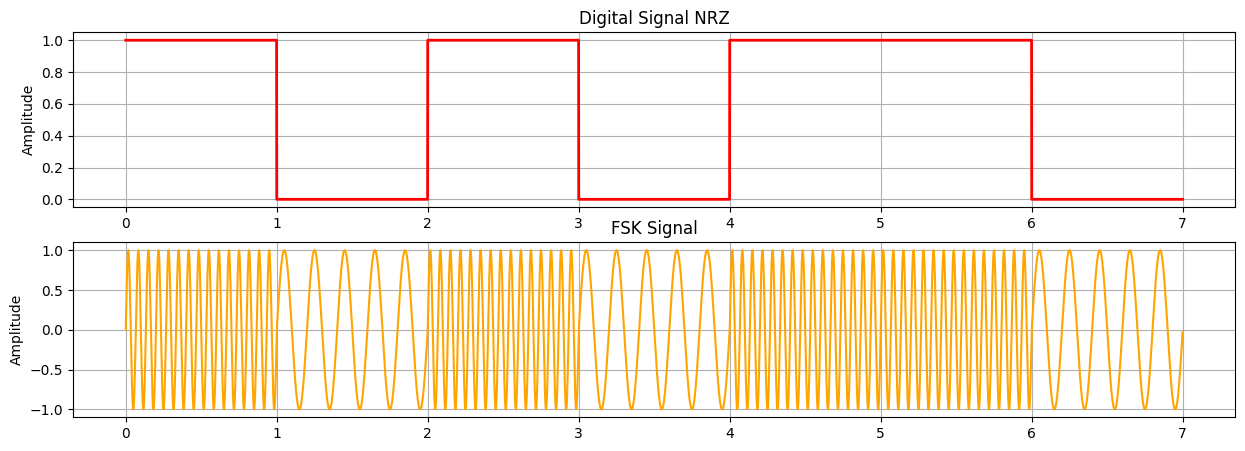

In [ ]:

def fsk_modulation(binary_string, time, carrier_freq_1, carrier_freq_0, samples_per_bit):
    """Frequency Shift Keying modulation."""
    modulated_signal = []

    for i, bit in enumerate(binary_string):
        if bit == 1:
            wave_piece = generate_carrier(carrier_freq_1, time[i * samples_per_bit:(i + 1) * samples_per_bit])
        else:
            wave_piece = generate_carrier(carrier_freq_0, time[i * samples_per_bit:(i + 1) * samples_per_bit])
        modulated_signal.extend(wave_piece)

    return np.array(modulated_signal)


# Generate modulated signals
pam_signal = pam_modulation(binary_string, time, carrier_freq, samples_per_bit)
fsk_signal = fsk_modulation(binary_string, time, carrier_freq_1, carrier_freq_0, samples_per_bit)


# Plot signals
plt.figure(figsize=(15,5))

plt.subplot(2, 1, 1)
plt.plot(time, pam_signal, color='red', linewidth=2)
plt.title("Digital Signal NRZ")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, fsk_signal, color='orange')
plt.title("FSK Signal")
plt.ylabel("Amplitude")
plt.grid()


## PSK

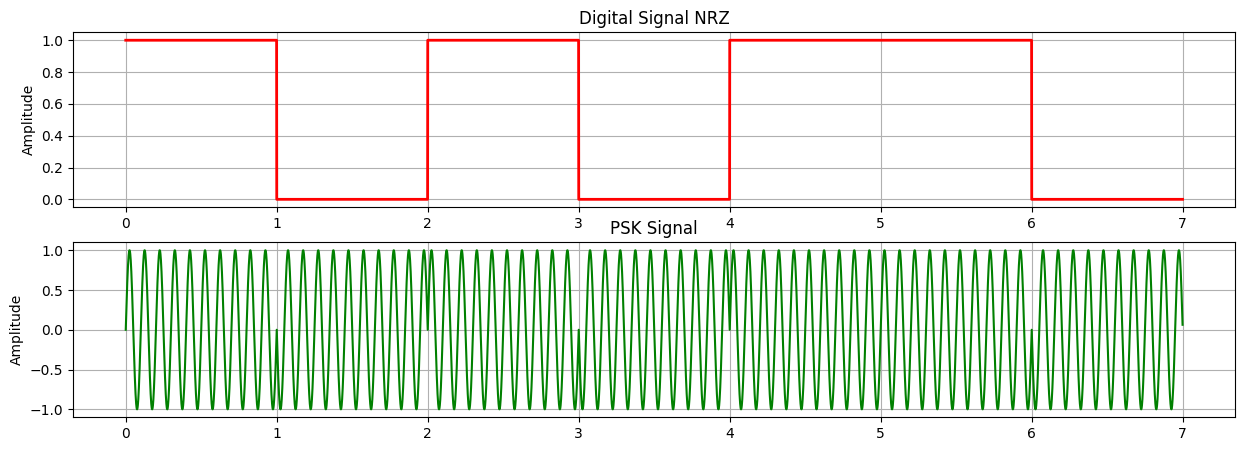

In [ ]:

def psk_modulation(binary_string, time, carrier_freq, samples_per_bit):
    """Phase Shift Keying modulation."""
    modulated_signal = []
    phase_shift = np.pi  # 180 degrees phase shift

    for i, bit in enumerate(binary_string):
        if bit == 1:
            wave_piece = generate_carrier(carrier_freq, time[i * samples_per_bit:(i + 1) * samples_per_bit])
        else:
            wave_piece = -generate_carrier(carrier_freq, time[i * samples_per_bit:(i + 1) * samples_per_bit])
        modulated_signal.extend(wave_piece)

    return np.array(modulated_signal)


# Generate modulated signals
pam_signal = pam_modulation(binary_string, time, carrier_freq, samples_per_bit)
psk_signal = psk_modulation(binary_string, time, carrier_freq, samples_per_bit)


# Plot signals
plt.figure(figsize=(15,5))

plt.subplot(2, 1, 1)
plt.plot(time, pam_signal, color='red', linewidth=2)
plt.title("Digital Signal NRZ")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, psk_signal, color='green')
plt.title("PSK Signal")
plt.ylabel("Amplitude")
plt.grid()


## Confronto

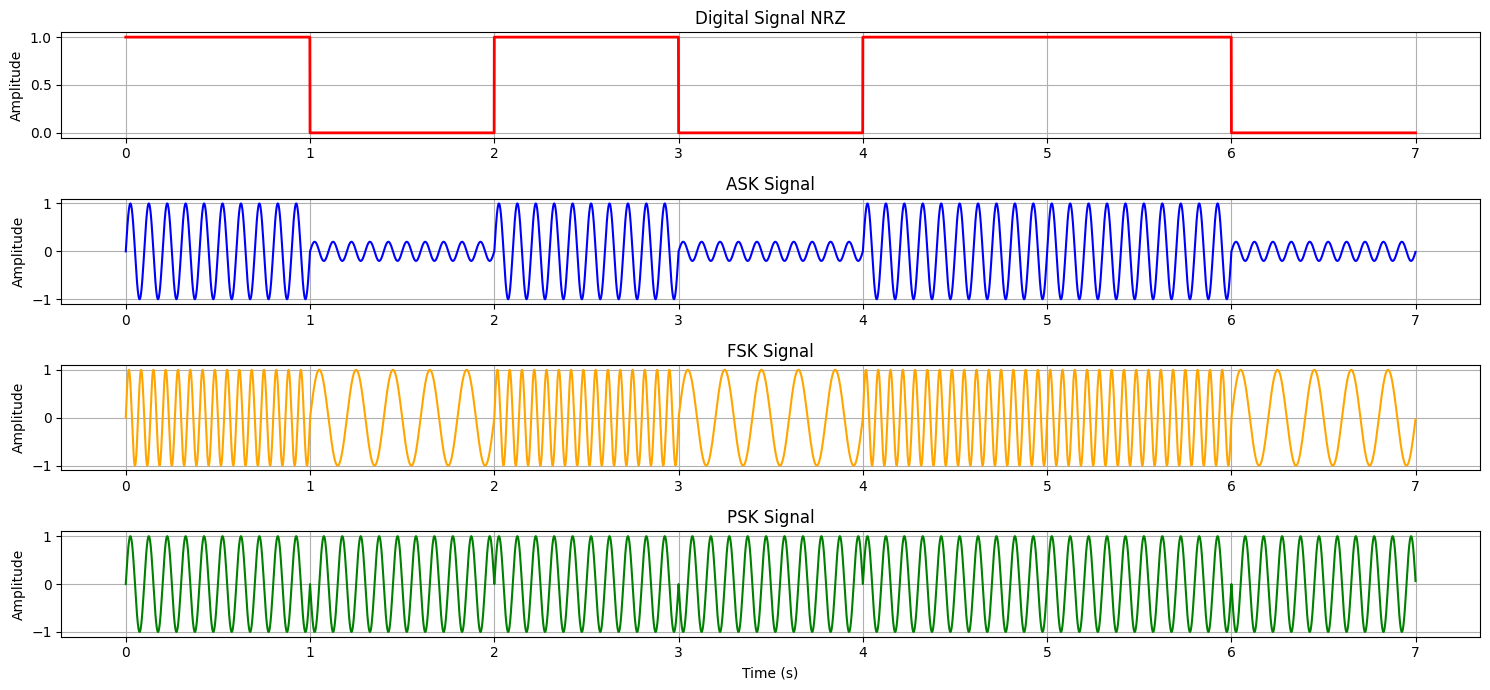

In [ ]:

# Generate modulated signals
pam_signal = pam_modulation(binary_string, time, carrier_freq, samples_per_bit)
ask_signal = ask_modulation(binary_string, time, carrier_freq, samples_per_bit, lower_amplitude = 0.2)
fsk_signal = fsk_modulation(binary_string, time, carrier_freq_1, carrier_freq_0, samples_per_bit)
psk_signal = psk_modulation(binary_string, time, carrier_freq, samples_per_bit)

# Plot signals
plt.figure(figsize=(15,7))

plt.subplot(4, 1, 1)
plt.plot(time, pam_signal, color='red', linewidth=2)
plt.title("Digital Signal NRZ")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(time, ask_signal, color='blue')
plt.title("ASK Signal")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(time, fsk_signal, color='orange')
plt.title("FSK Signal")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(time, psk_signal, color='green')
plt.title("PSK Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.grid()

plt.tight_layout()
plt.show()


# Codici ottimizzati

In [ ]:

def ask_modulation(binary_string, time, carrier_freq, samples_per_bit, lower_amplitude):
    """Amplitude Shift Keying modulation."""
    carrier = generate_carrier(carrier_freq, time)

    return np.hstack([
      carrier[i * samples_per_bit:(i + 1) * samples_per_bit] if bit else lower_amplitude * carrier[i * samples_per_bit:(i + 1) * samples_per_bit]
      for i, bit in enumerate(binary_string)])


In [ ]:

def fsk_modulation(binary_string, time, carrier_freq_1, carrier_freq_0, samples_per_bit):
    """Frequency Shift Keying modulation."""
    return np.hstack([
        generate_carrier(carrier_freq_1 if bit else carrier_freq_0, time[i * samples_per_bit:(i + 1) * samples_per_bit])
        for i, bit in enumerate(binary_string)
    ])


In [ ]:

def psk_modulation(binary_string, time, carrier_freq, samples_per_bit):
    """Phase Shift Keying modulation."""
    phase_shift = np.pi  # 180 degrees phase shift
    return np.hstack([
        generate_carrier(carrier_freq, time[i * samples_per_bit:(i + 1) * samples_per_bit]) if bit else
        -generate_carrier(carrier_freq, time[i * samples_per_bit:(i + 1) * samples_per_bit])
        for i, bit in enumerate(binary_string)
    ])
